In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
previsao_df = pd.read_csv('../Docs/resultado_predicao.csv')
treino_df = pd.read_csv('../Docs/modelo_treino.csv')
df_previsao = pd.merge(previsao_df, treino_df, on='ID_PACIENTE', how='outer')
df_original = pd.read_csv('../Docs/dados_covid.csv', delimiter=";")
evolucao_zona_previsao = df_previsao[['EVOLUCAO_x', 'ZONA_GEOGRAFICA']]
evolucao_zona_original = df_original[['EVOLUCAO', 'CS_ZONA']]
evolucao_idade_previsao = df_previsao[['EVOLUCAO_x', 'IDADE']]
evolucao_idade_original = df_original[['EVOLUCAO', 'NU_IDADE_N']]
evolucao_hospital_previsao = df_previsao[['EVOLUCAO_x', 'HOSPITAL']]
evolucao_hospital_original = df_original[['EVOLUCAO', 'HOSPITAL']]
evolucao_uti_previsao = df_previsao[['EVOLUCAO_x', 'UTI']]
evolucao_uti_original = df_original[['EVOLUCAO', 'UTI']]
evolucao_ventilatorio_previsao = df_previsao[['EVOLUCAO_x', 'SUPORT_VEN']]
evolucao_ventilatorio_original = df_original[['EVOLUCAO', 'SUPORT_VEN']]

C:\Users\Vinicius\AppData\Local\Temp\ipykernel_10808\1689643344.py:4: DtypeWarning: Columns (15,59,61,62,63,91,93,122,143) have mixed types. Specify dtype option on import or set low_memory=False.
  df_original = pd.read_csv('../Docs/dados_covid.csv', delimiter=";")


C:\Users\Vinicius\AppData\Local\Temp\ipykernel_10808\3554879145.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evolucao_zona_previsao.drop(evolucao_zona_previsao.loc[evolucao_zona_previsao['EVOLUCAO_x']!=2].index, inplace=True)
C:\Users\Vinicius\AppData\Local\Temp\ipykernel_10808\3554879145.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evolucao_zona_previsao.drop(evolucao_zona_previsao.loc[evolucao_zona_previsao['ZONA_GEOGRAFICA']==9].index, inplace=True)
C:\Users\Vinicius\AppData\Local\Temp\ipykernel_10808\3554879145.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

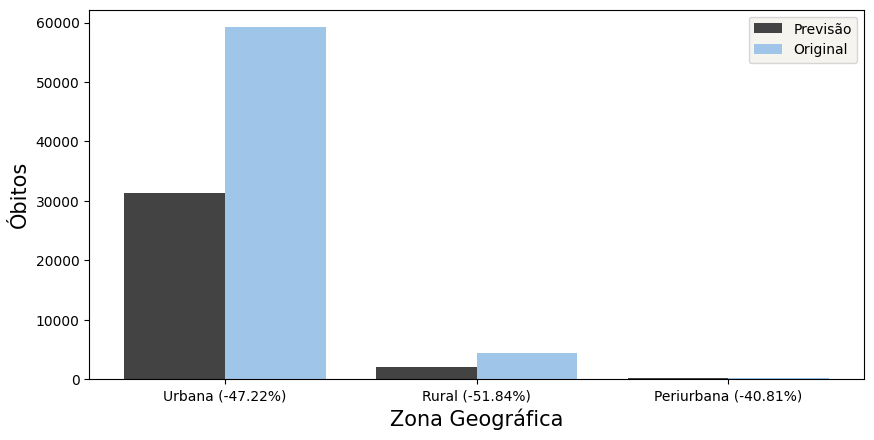

In [3]:
evolucao_zona_previsao.drop(evolucao_zona_previsao.loc[evolucao_zona_previsao['EVOLUCAO_x']!=2].index, inplace=True)
evolucao_zona_previsao.drop(evolucao_zona_previsao.loc[evolucao_zona_previsao['ZONA_GEOGRAFICA']==9].index, inplace=True)
evolucao_zona_previsao = dict(evolucao_zona_previsao['ZONA_GEOGRAFICA'].value_counts())

evolucao_zona_original.drop(evolucao_zona_original.loc[evolucao_zona_original['EVOLUCAO']!=2].index, inplace=True)
evolucao_zona_original.drop(evolucao_zona_original.loc[evolucao_zona_original['CS_ZONA']==9].index, inplace=True)
evolucao_zona_original = dict(evolucao_zona_original['CS_ZONA'].value_counts())

total_predicao = [value for key, value in evolucao_zona_previsao.items()]
total_original = [value for key, value in evolucao_zona_original.items()]
lista_variacao = []

for i in range(3):
    lista_variacao.append(round(((total_predicao[i] - total_original[i])/total_original[i])*100, 2))

X = [f'Urbana ({lista_variacao[0]}%)', f'Rural ({lista_variacao[1]}%)', f'Periurbana ({lista_variacao[2]}%)']
X_axis = np.arange(len(X))
figure_size = plt.figure()
figure_size.set_figwidth(10)
plt.bar(X_axis - 0.2, [value for key, value in evolucao_zona_previsao.items()], 0.4, label = 'Previsão', color="#434343")
plt.bar(X_axis + 0.2, [value for key, value in evolucao_zona_original.items()], 0.4, label = 'Original', color="#9fc5e8ff")
plt.xlabel('Zona Geográfica', fontsize=15)
plt.ylabel('Óbitos', fontsize=15)
plt.xticks(X_axis, X)
plt.legend(facecolor="#f4f2ecff")
plt.savefig('../Graficos/evolucao_zona.png', transparent=True)
plt.show()

C:\Users\Vinicius\AppData\Local\Temp\ipykernel_10808\1446492352.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evolucao_idade_previsao.drop(evolucao_idade_previsao.loc[evolucao_idade_previsao['EVOLUCAO_x']!=2].index, inplace=True)
C:\Users\Vinicius\AppData\Local\Temp\ipykernel_10808\1446492352.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evolucao_idade_original.drop(evolucao_idade_original.loc[evolucao_idade_original['EVOLUCAO']!=2].index, inplace=True)


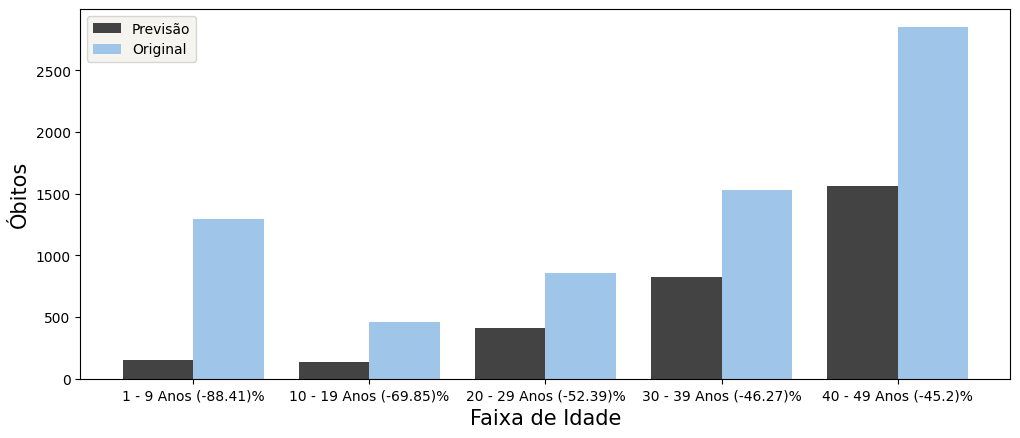

In [4]:
evolucao_idade_previsao.drop(evolucao_idade_previsao.loc[evolucao_idade_previsao['EVOLUCAO_x']!=2].index, inplace=True)
evolucao_idade_previsao = evolucao_idade_previsao.groupby(['IDADE']).count().values.tolist()
evolucao_idade_previsao = {
    '1 - 9 Anos': sum([valor[0] for valor in evolucao_idade_previsao[0:9]]),
    '10 - 19 Anos': sum([valor[0] for valor in evolucao_idade_previsao[10:19]]),
    '20 - 29 Anos': sum([valor[0] for valor in evolucao_idade_previsao[20:29]]),
    '30 - 39 Anos': sum([valor[0] for valor in evolucao_idade_previsao[30:39]]),
    '40 - 49 Anos': sum([valor[0] for valor in evolucao_idade_previsao[40:49]])
}

evolucao_idade_original.drop(evolucao_idade_original.loc[evolucao_idade_original['EVOLUCAO']!=2].index, inplace=True)
evolucao_idade_original = evolucao_idade_original.groupby(['NU_IDADE_N']).count().values.tolist()
evolucao_idade_original = {
    '1 - 9 Anos': sum([valor[0] for valor in evolucao_idade_original[0:9]]),
    '10 - 19 Anos': sum([valor[0] for valor in evolucao_idade_original[10:19]]),
    '20 - 29 Anos': sum([valor[0] for valor in evolucao_idade_original[20:29]]),
    '30 - 39 Anos': sum([valor[0] for valor in evolucao_idade_original[30:39]]),
    '40 - 49 Anos': sum([valor[0] for valor in evolucao_idade_original[40:49]])
}

total_predicao = [value for key, value in evolucao_idade_previsao.items()]
total_original = [value for key, value in evolucao_idade_original.items()]
lista_variacao = []

for i in range(5):
    lista_variacao.append(round(((total_predicao[i] - total_original[i])/total_original[i])*100, 2))

X = [f'1 - 9 Anos ({lista_variacao[0]})%', f'10 - 19 Anos ({lista_variacao[1]})%', f'20 - 29 Anos ({lista_variacao[2]})%', f'30 - 39 Anos ({lista_variacao[3]})%', f'40 - 49 Anos ({lista_variacao[4]})%']
X_axis = np.arange(len(X))
figure_size = plt.figure()
figure_size.set_figwidth(12)
plt.bar(X_axis - 0.2, [value for key, value in evolucao_idade_previsao.items()], 0.4, label = 'Previsão', color="#434343")
plt.bar(X_axis + 0.2, [value for key, value in evolucao_idade_original.items()], 0.4, label = 'Original', color="#9fc5e8ff")
plt.xlabel('Faixa de Idade', fontsize=15)
plt.ylabel('Óbitos', fontsize=15)
plt.xticks(X_axis, X)
plt.legend(facecolor="#f4f2ecff")
plt.savefig('../Graficos/evolucao_idade.png', transparent=True)
plt.show()

In [5]:
previsao_df = pd.read_csv('../Docs/resultado_predicao.csv')
treino_df = pd.read_csv('../Docs/modelo_treino.csv')
df_previsao = pd.merge(previsao_df, treino_df, on='ID_PACIENTE', how='outer')
df_original = pd.read_csv('../Docs/dados_covid.csv', delimiter=";")
evolucao_idade_previsao = df_previsao[['EVOLUCAO_x', 'IDADE']]
evolucao_idade_original = df_original[['EVOLUCAO', 'NU_IDADE_N']]

C:\Users\Vinicius\AppData\Local\Temp\ipykernel_10808\860060831.py:4: DtypeWarning: Columns (15,59,61,62,63,91,93,122,143) have mixed types. Specify dtype option on import or set low_memory=False.
  df_original = pd.read_csv('../Docs/dados_covid.csv', delimiter=";")


C:\Users\Vinicius\AppData\Local\Temp\ipykernel_10808\3763945094.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evolucao_idade_previsao.drop(evolucao_idade_previsao.loc[evolucao_idade_previsao['EVOLUCAO_x']!=2].index, inplace=True)
C:\Users\Vinicius\AppData\Local\Temp\ipykernel_10808\3763945094.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evolucao_idade_original.drop(evolucao_idade_original.loc[evolucao_idade_original['EVOLUCAO']!=2].index, inplace=True)


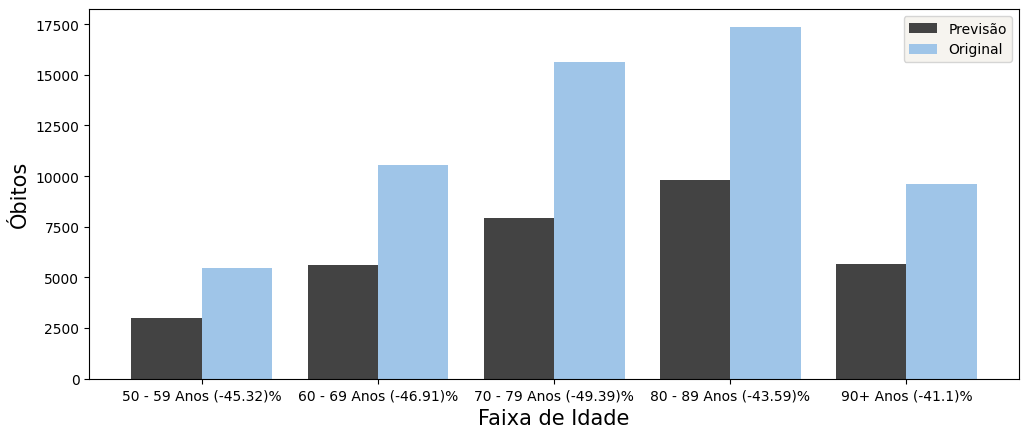

In [6]:
evolucao_idade_previsao.drop(evolucao_idade_previsao.loc[evolucao_idade_previsao['EVOLUCAO_x']!=2].index, inplace=True)
evolucao_idade_previsao = evolucao_idade_previsao.groupby(['IDADE']).count().values.tolist()
evolucao_idade_previsao = {
    '50 - 59 Anos': sum([valor[0] for valor in evolucao_idade_previsao[50:59]]),
    '60 - 69 Anos': sum([valor[0] for valor in evolucao_idade_previsao[60:69]]),
    '70 - 79 Anos': sum([valor[0] for valor in evolucao_idade_previsao[70:79]]),
    '80 - 89 Anos': sum([valor[0] for valor in evolucao_idade_previsao[80:89]]),
    '90+ Anos': sum([valor[0] for valor in evolucao_idade_previsao[90:]]),
}

evolucao_idade_original.drop(evolucao_idade_original.loc[evolucao_idade_original['EVOLUCAO']!=2].index, inplace=True)
evolucao_idade_original = evolucao_idade_original.groupby(['NU_IDADE_N']).count().values.tolist()
evolucao_idade_original = {
    '50 - 59 Anos': sum([valor[0] for valor in evolucao_idade_original[50:59]]),
    '60 - 69 Anos': sum([valor[0] for valor in evolucao_idade_original[60:69]]),
    '70 - 79 Anos': sum([valor[0] for valor in evolucao_idade_original[70:79]]),
    '80 - 89 Anos': sum([valor[0] for valor in evolucao_idade_original[80:89]]),
    '90+ Anos': sum([valor[0] for valor in evolucao_idade_original[90:]]),
}

total_predicao = [value for key, value in evolucao_idade_previsao.items()]
total_original = [value for key, value in evolucao_idade_original.items()]
lista_variacao = []

for i in range(5):
    lista_variacao.append(round(((total_predicao[i] - total_original[i])/total_original[i])*100, 2))

X = [f'50 - 59 Anos ({lista_variacao[0]})%', f'60 - 69 Anos ({lista_variacao[1]})%', f'70 - 79 Anos ({lista_variacao[2]})%', f'80 - 89 Anos ({lista_variacao[3]})%', f'90+ Anos ({lista_variacao[4]})%']
X_axis = np.arange(len(X))
figure_size = plt.figure()
figure_size.set_figwidth(12)
plt.bar(X_axis - 0.2, [value for key, value in evolucao_idade_previsao.items()], 0.4, label = 'Previsão', color="#434343")
plt.bar(X_axis + 0.2, [value for key, value in evolucao_idade_original.items()], 0.4, label = 'Original', color="#9fc5e8ff")
plt.xlabel('Faixa de Idade', fontsize=15)
plt.ylabel('Óbitos', fontsize=15)
plt.xticks(X_axis, X)
plt.legend(facecolor="#f4f2ecff")
plt.savefig('../Graficos/evolucao_idade_2.png', transparent=True)
plt.show()

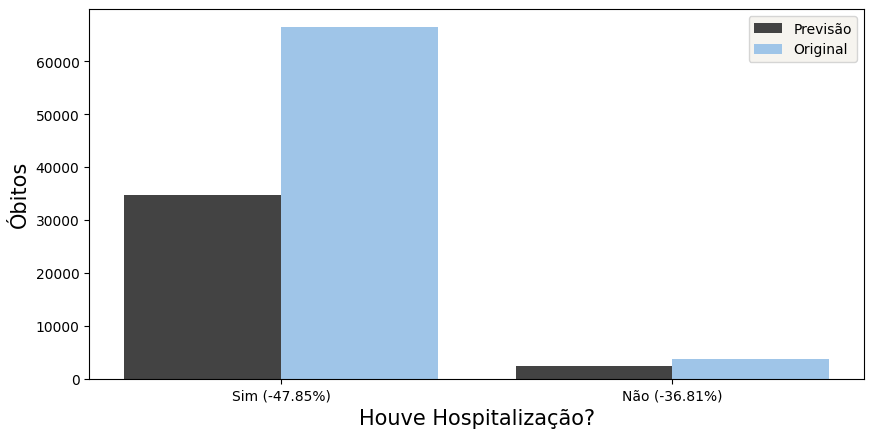

In [7]:
evolucao_hospital_previsao.drop(evolucao_hospital_previsao.loc[evolucao_hospital_previsao['EVOLUCAO_x']!=2].index, inplace=True)
evolucao_hospital_previsao.drop(evolucao_hospital_previsao.loc[evolucao_hospital_previsao['HOSPITAL']==9].index, inplace=True)
evolucao_hospital_previsao = dict(evolucao_hospital_previsao['HOSPITAL'].value_counts())

evolucao_hospital_original.drop(evolucao_hospital_original.loc[evolucao_hospital_original['EVOLUCAO']!=2].index, inplace=True)
evolucao_hospital_original.drop(evolucao_hospital_original.loc[evolucao_hospital_original['HOSPITAL']==9].index, inplace=True)
evolucao_hospital_original = dict(evolucao_hospital_original['HOSPITAL'].value_counts())

total_predicao = [value for key, value in evolucao_hospital_previsao.items()]
total_original = [value for key, value in evolucao_hospital_original.items()]
lista_variacao = []

for i in range(2):
    lista_variacao.append(round(((total_predicao[i] - total_original[i])/total_original[i])*100, 2))

X = [f'Sim ({lista_variacao[0]}%)', f'Não ({lista_variacao[1]}%)']
X_axis = np.arange(len(X))
figure_size = plt.figure()
figure_size.set_figwidth(10)
plt.bar(X_axis - 0.2, [value for key, value in evolucao_hospital_previsao.items()], 0.4, label = 'Previsão', color="#434343")
plt.bar(X_axis + 0.2, [value for key, value in evolucao_hospital_original.items()], 0.4, label = 'Original', color="#9fc5e8ff")
plt.xlabel('Houve Hospitalização?', fontsize=15)
plt.ylabel('Óbitos', fontsize=15)
plt.xticks(X_axis, X)
plt.legend(facecolor="#f4f2ecff")
plt.savefig('../Graficos/evolucao_hospital.png', transparent=True)
plt.show()

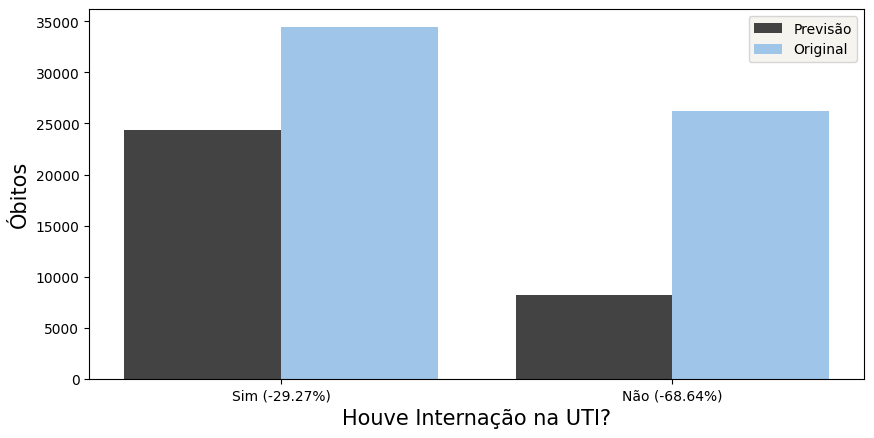

In [8]:
evolucao_uti_previsao.drop(evolucao_uti_previsao.loc[evolucao_uti_previsao['EVOLUCAO_x']!=2].index, inplace=True)
evolucao_uti_previsao.drop(evolucao_uti_previsao.loc[evolucao_uti_previsao['UTI']==9].index, inplace=True)
evolucao_uti_previsao = dict(evolucao_uti_previsao['UTI'].value_counts())

evolucao_uti_original.drop(evolucao_uti_original.loc[evolucao_uti_original['EVOLUCAO']!=2].index, inplace=True)
evolucao_uti_original.drop(evolucao_uti_original.loc[evolucao_uti_original['UTI']==9].index, inplace=True)
evolucao_uti_original = dict(evolucao_uti_original['UTI'].value_counts())

total_predicao = [value for key, value in evolucao_uti_previsao.items()]
total_original = [value for key, value in evolucao_uti_original.items()]
lista_variacao = []

for i in range(2):
    lista_variacao.append(round(((total_predicao[i] - total_original[i])/total_original[i])*100, 2))

X = [f'Sim ({lista_variacao[0]}%)', f'Não ({lista_variacao[1]}%)']
X_axis = np.arange(len(X))
figure_size = plt.figure()
figure_size.set_figwidth(10)
plt.bar(X_axis - 0.2, [value for key, value in evolucao_uti_previsao.items()], 0.4, label = 'Previsão', color="#434343")
plt.bar(X_axis + 0.2, [value for key, value in evolucao_uti_original.items()], 0.4, label = 'Original', color="#9fc5e8ff")
plt.xlabel('Houve Internação na UTI?', fontsize=15)
plt.ylabel('Óbitos', fontsize=15)
plt.xticks(X_axis, X)
plt.legend(facecolor="#f4f2ecff")
plt.savefig('../Graficos/evolucao_uti.png', transparent=True)
plt.show()

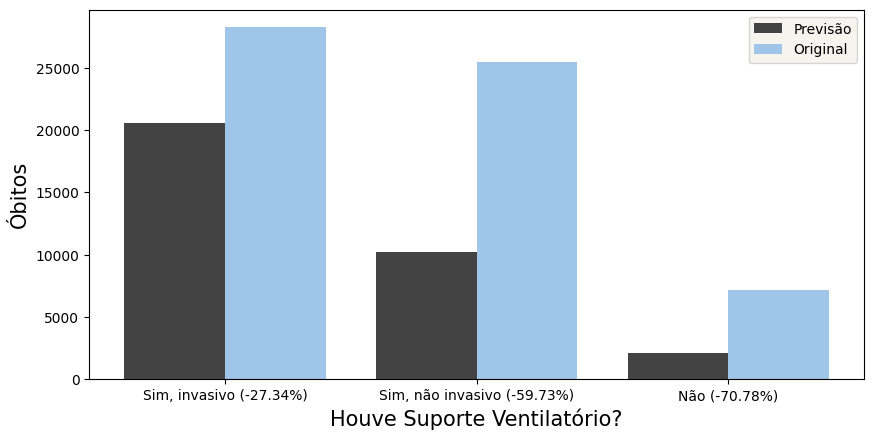

In [9]:
evolucao_ventilatorio_previsao.drop(evolucao_ventilatorio_previsao.loc[evolucao_ventilatorio_previsao['EVOLUCAO_x']!=2].index, inplace=True)
evolucao_ventilatorio_previsao.drop(evolucao_ventilatorio_previsao.loc[evolucao_ventilatorio_previsao['SUPORT_VEN']==9].index, inplace=True)
evolucao_ventilatorio_previsao = dict(evolucao_ventilatorio_previsao['SUPORT_VEN'].value_counts())

evolucao_ventilatorio_original.drop(evolucao_ventilatorio_original.loc[evolucao_ventilatorio_original['EVOLUCAO']!=2].index, inplace=True)
evolucao_ventilatorio_original.drop(evolucao_ventilatorio_original.loc[evolucao_ventilatorio_original['SUPORT_VEN']==9].index, inplace=True)
evolucao_ventilatorio_original = dict(evolucao_ventilatorio_original['SUPORT_VEN'].value_counts())

total_predicao = [value for key, value in evolucao_ventilatorio_previsao.items()]
total_original = [value for key, value in evolucao_ventilatorio_original.items()]
lista_variacao = []

for i in range(3):
    lista_variacao.append(round(((total_predicao[i] - total_original[i])/total_original[i])*100, 2))

X = [f'Sim, invasivo ({lista_variacao[0]}%)', f'Sim, não invasivo ({lista_variacao[1]}%)', f'Não ({lista_variacao[2]}%)']
X_axis = np.arange(len(X))
figure_size = plt.figure()
figure_size.set_figwidth(10)
plt.bar(X_axis - 0.2, [value for key, value in evolucao_ventilatorio_previsao.items()], 0.4, label = 'Previsão', color="#434343")
plt.bar(X_axis + 0.2, [value for key, value in evolucao_ventilatorio_original.items()], 0.4, label = 'Original', color="#9fc5e8ff")
plt.xlabel('Houve Suporte Ventilatório?', fontsize=15)
plt.ylabel('Óbitos', fontsize=15)
plt.xticks(X_axis, X)
plt.legend(facecolor="#f4f2ecff")
plt.savefig('../Graficos/evolucao_ventilatorio.png', transparent=True)
plt.show()

In [10]:
# evolucao_feminino.drop(evolucao_feminino.loc[evolucao_feminino['EVOLUCAO']!=2].index, inplace=True)
# evolucao_feminino.drop(evolucao_feminino.loc[evolucao_feminino['SEXO_F']!=1].index, inplace=True)
# evolucao_feminino['SEXO_F'] = evolucao_feminino['SEXO_F'].replace(1, 'Feminino')
# evolucao_feminino = dict(evolucao_feminino['SEXO_F'].value_counts())

# evolucao_masculino.drop(evolucao_masculino.loc[evolucao_masculino['EVOLUCAO']!=2].index, inplace=True)
# evolucao_masculino.drop(evolucao_masculino.loc[evolucao_masculino['SEXO_M']!=1].index, inplace=True)
# evolucao_masculino['SEXO_M'] = evolucao_masculino['SEXO_M'].replace(1, 'Masculino')
# evolucao_masculino = dict(evolucao_masculino['SEXO_M'].value_counts())

# evolucao_sexo = evolucao_feminino | evolucao_masculino

# figure_size = plt.figure()
# figure_size.set_figwidth(8)
# plt.xlabel('Sexo', fontsize=15)
# plt.ylabel('Óbitos', fontsize=15)
# plt.bar(*zip(*evolucao_sexo.items()), color="Black")
# plt.savefig('../Graficos/evolucao_sexo.png')